<a href="https://colab.research.google.com/github/Orelep/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

# ссылка на файл csv
url = "https://drive.google.com/uc?export=download&id=1z8JczgPSRSKLY_BjCk2c1T-XODY-86YS"

# чтение данных из файлов
input_df = pd.read_csv(url, sep = ';', index_col = None)

# вывод первых 5 строк
input_df.head()


,Forecast,Station_A,Station_B,Station_C,Station_D
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
# вывод последних 5 строк
input_df.tail()

,Forecast,Station_A,Station_B,Station_C,Station_D
2055,NaN,NaN,NaN,NaN,NaN
2056,NaN,NaN,NaN,NaN,NaN
2057,NaN,NaN,NaN,NaN,NaN
2058,NaN,NaN,NaN,NaN,NaN
2059,NaN,NaN,NaN,NaN,NaN


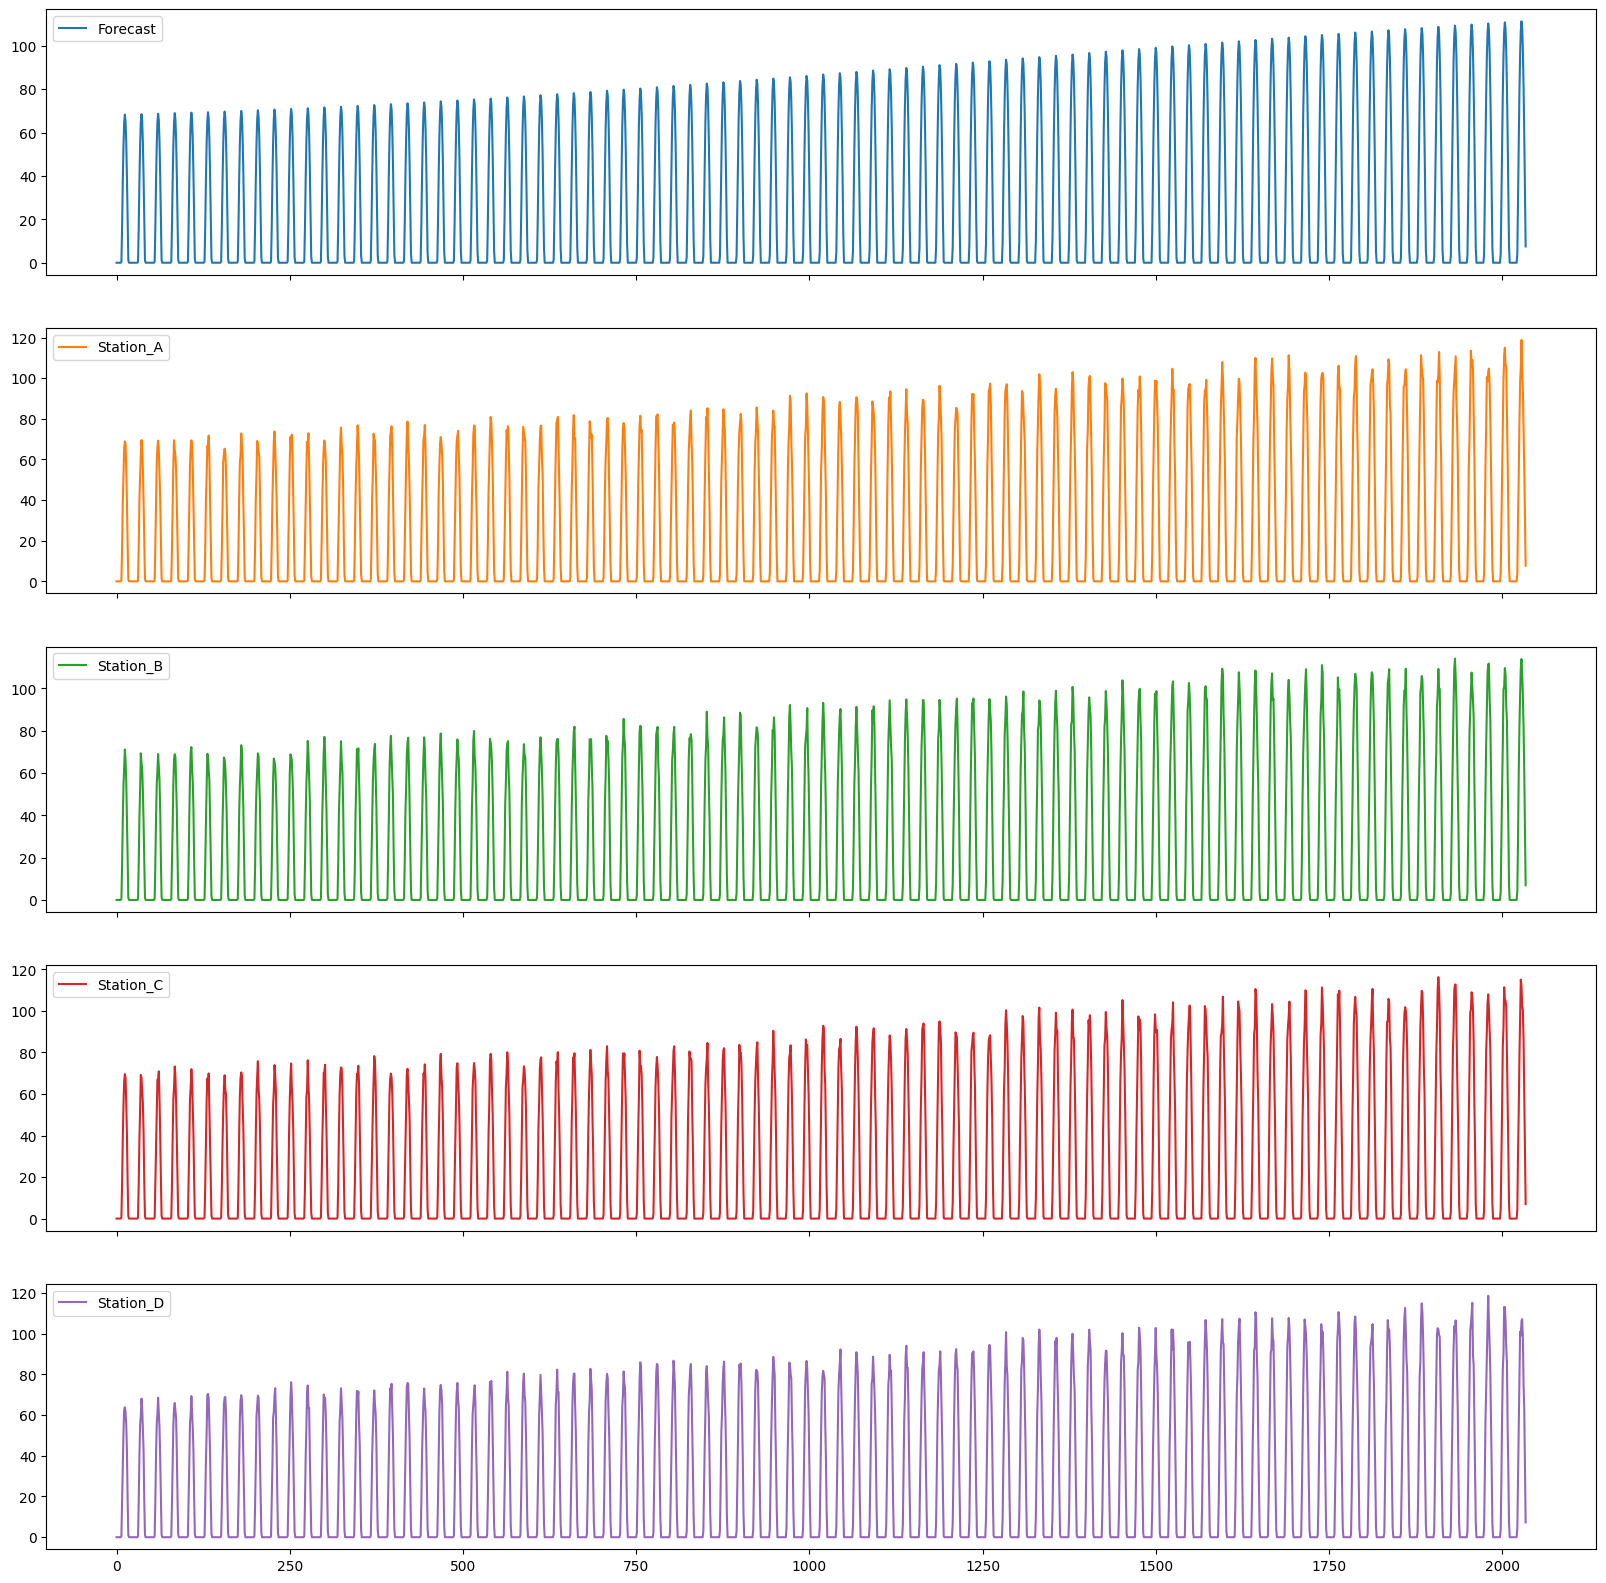

In [ ]:
# Построение графиков выработки электростанций

axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)
plt.savefig('Графики выработки')

In [ ]:
# Вывод средних значений
input_df.describe()

,Forecast,Station_A,Station_B,Station_C,Station_D
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,25.551794,25.611636,25.504026,25.537623,25.596606
std,34.217238,34.360856,34.199689,34.263350,34.343093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.450000,55.120224,55.029140,54.780797,55.074871
max,111.300000,118.831845,114.113682,116.256226,118.541045


In [ ]:
# Перевод в матрицу
input_matrix = input_df.values

# Вывод размерности матрицы
print('размерность матрицы', input_matrix.shape)
print()

# Перенос значений данных ваработки каждой электростанции в отдельную переменную
prognoz = np.zeros(len(input_matrix))
A = np.zeros(len(input_matrix))
B = np.zeros(len(input_matrix))
C = np.zeros(len(input_matrix))
D = np.zeros(len(input_matrix))

for i in range (len(input_matrix)):
  prognoz[i] = input_matrix[i, 0]
  A[i] = input_matrix[i, 1]
  B[i] = input_matrix[i, 2]
  C[i] = input_matrix[i, 3]
  D[i] = input_matrix[i, 4]


# Построение интерактивных графиков выработки электроэнергии для каждой станции
output_notebook()

a = figure(width = 800, height = 400)

a.line(np.arange(len(input_matrix)), A, line_width = 2, color = 'orange')

b = figure(width = 800, height = 400)

b.line(np.arange(len(input_matrix)), B, line_width = 2, color = 'green')

c = figure(width = 800, height = 400)

c.line(np.arange(len(input_matrix)), C, line_width = 2, color = 'red')

d = figure(width = 800, height = 400)

d.line(np.arange(len(input_matrix)), D, line_width = 2, color = 'purple')

show(a)
show(b)
show(c)
show(d)

# Сохранение как Excel файл

data_frame1 = pd.DataFrame(A)
data_frame2 = pd.DataFrame(B)
data_frame3 = pd.DataFrame(C)
data_frame4 = pd.DataFrame(D)

data_frame1.to_excel('Выработка A.xlsx', index = False, header = ['Значение выработки'])
data_frame2.to_excel('Выработка B.xlsx', index = False, header = ['Значение выработки'])
data_frame3.to_excel('Выработка C.xlsx', index = False, header = ['Значение выработки'])
data_frame4.to_excel('Выработка D.xlsx', index = False, header = ['Значение выработки'])

размерность матрицы (2060, 5)



In [ ]:
# Построение графиков ошибки прогноза для каждой СЭС

Aoch = np.zeros(len(input_matrix))
Boch = np.zeros(len(input_matrix))
Coch = np.zeros(len(input_matrix))
Doch = np.zeros(len(input_matrix))

for i in range (len(input_matrix)):
  Aoch[i] = prognoz[i] - A[i]
  Boch[i] = prognoz[i] - B[i]
  Coch[i] = prognoz[i] - C[i]
  Doch[i] = prognoz[i] - D[i]

output_notebook()

aoch = figure(width = 800, height = 400)

aoch.line(np.arange(len(input_matrix)), Aoch, line_width = 2, color = 'orange')


boch = figure(width = 800, height = 400)

boch.line(np.arange(len(input_matrix)), Boch, line_width = 2, color = 'green')


coch = figure(width = 800, height = 400)

coch.line(np.arange(len(input_matrix)), Coch, line_width = 2, color = 'red')


doch = figure(width = 800, height = 400)

doch.line(np.arange(len(input_matrix)), Doch, line_width = 2, color = 'purple')

show(aoch)
show(boch)
show(coch)
show(doch)

# Сохранение как Excel файл

data_frame5 = pd.DataFrame(Aoch)
data_frame6 = pd.DataFrame(Boch)
data_frame7 = pd.DataFrame(Coch)
data_frame8 = pd.DataFrame(Doch)

data_frame5.to_excel('Ошибки прогноза A.xlsx', index = False, header = ['Значение расхождения'])
data_frame6.to_excel('Ошибки прогноза B.xlsx', index = False, header = ['Значение расхождения'])
data_frame7.to_excel('Ошибки прогноза C.xlsx', index = False, header = ['Значение расхождения'])
data_frame8.to_excel('Ошибки прогноза D.xlsx', index = False, header = ['Значение расхождения'])

In [ ]:
# Просчёт RMSE для каждой СЭС

asr = 0
bsr = 0
csr = 0
dsr = 0

for i in range (len(input_matrix[:2035,:])):
  Asr = (prognoz[i] - A[i])*(prognoz[i] - A[i])
  asr = asr + Asr

  Bsr = (prognoz[i] - B[i])*(prognoz[i] - B[i])
  bsr = bsr + Bsr

  Csr = (prognoz[i] - C[i])*(prognoz[i] - C[i])
  csr = csr + Csr

  Dsr = (prognoz[i] - D[i])*(prognoz[i] - D[i])
  dsr = dsr + Dsr

Armse = np.sqrt(asr/(len(input_matrix[:2035,:])))
Brmse = np.sqrt(bsr/(len(input_matrix[:2035,:])))
Crmse = np.sqrt(csr/(len(input_matrix[:2035,:])))
Drmse = np.sqrt(dsr/(len(input_matrix[:2035,:])))

print('RMSE для станции A = ',Armse)
print('RMSE для станции B = ',Brmse)
print('RMSE для станции C = ',Crmse)
print('RMSE для станции D = ',Drmse)

RMSE для станции A =  1.9618429107992508
RMSE для станции B =  1.8874769589241682
RMSE для станции C =  2.0069180748430853
RMSE для станции D =  1.9854418675954262
